In [105]:
from sklearn import svm
import os
import numpy as np
import pandas as pd
from matplotlib import pylab as plt
import datetime
import pickle
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [18]:
work_dir = 'D:/coding/bitbucket_repo_dl/data_mail/2021/ml_task_A/'

In [122]:
with open(work_dir+'data/user-features.csv', 'r') as user_features_file:
    df_uf = pd.read_csv(user_features_file, delimiter=',')
print(df_uf.values[-1])
df_uf.head()

[ 1.49990000e+04  9.52242068e-01  4.91978556e-03  6.50599417e-02
  1.86796646e-01 -1.31743349e-01 -2.22876755e-02 -4.42124059e-02
 -5.82853169e-03 -3.37669754e-02  4.36444031e-02  7.24133902e-02
  1.21444651e-01 -8.83988936e-02  1.23474361e-02 -2.12644809e-03
  5.68718504e-02]


user_id         0         1         2         3         4         5  \
0        0  0.959484  0.024890  0.119709  0.083119  0.049700  0.032604   
1        1  0.968620 -0.035631  0.046282  0.045676  0.114160  0.018050   
2        2  0.933710  0.030084 -0.039121  0.116893  0.130813  0.171836   
3        3  0.962006 -0.030586 -0.188485  0.012392  0.031410  0.057475   
4        4  0.967180  0.095349 -0.036897 -0.048526 -0.009786  0.035573   

          6         7         8         9        10        11        12  \
0 -0.049732  0.005637  0.120104  0.125555  0.085036  0.084546 -0.024835   
1 -0.003364 -0.032724 -0.076289 -0.056245 -0.077599  0.106774  0.061935   
2  0.030485 -0.054120 -0.056811 -0.007334  0.160973  0.109083  0.009491   
3  0.056365 -0.046878  0.029630  0.094262 -0.016992 -0.051303 -0.071980   
4  0.009612  0.097665 -0.103747  0.075146 -0.052034  0.091168  0.069708   

         13        14        15  
0 -0.038055 -0.045251  0.053042  
1 -0.015028 -0.106559 -0.003852  
2  0.127983  0.063371  0.003180  
3 -0.006859  0.095798 -0.034290  
4  0.046377  0.068546  0.040315

In [123]:
with open(work_dir+'data/train.csv', 'r') as train_file:
    df_train = pd.read_csv(train_file, delimiter=',')
print(df_train.values[-1])
df_train.head()

[14999     3    53]


user_id  item_id  order
0        0        0      1
1        0        1      2
2        0        2      3
3        0        3      4
4        0        4      5

In [119]:
df_train_y = pd.DataFrame(df_train.item_id / df_train.item_id.max())
df_train_y.to_csv(work_dir + 'data/train-y.csv', index=False)
df_train_y.head()

In [147]:
df_train_uf = pd.DataFrame(df_train)
df_train_uf = df_train_uf.drop("item_id", axis=1)
for i in range(16):
    df_train_uf[f'feature_{i}'] = [0]*len(df_train_uf)
ln = len(df_train_uf)
for i in range(ln):
    user = int(df_train_uf.values[i][0])
    #df_train_uf.values[i][2:] = df_uf.values[user][1:]
    for j in range(16):
        df_train_uf.loc[i, f'feature_{j}'] = df_uf.values[user][j + 1]
    #print(df_uf.values[user][1:])
    #print(df_train_uf.values[i][2:])
    #if i > 5:
    #    break
print(df_train_uf.values[-1])    
df_train_uf.head()


#df_train_uf.item_id = df_train_uf.item_id + 1
#df_train_uf.order = df_train_uf.order / 65
#print(df_train_uf.values[-1])
#print(len(df_train_uf))
#df_train_uf.head()
#users = [([]) for i in range(15000)]
#for i in range(len(df)):
#    row = df.values[i]
#    users[int(row[0])].append(int(row[1]))

#datetime.datetime.now().strftime("%d.%m.%Y_%H.%M.%S")}


KeyboardInterrupt: 

In [92]:
df_train.to_csv(work_dir + 'data/train-user-features.csv', index=False)

In [39]:
X_predict = np.zeros((17), float)#
X_predict[0] = 56/65
X_predict[1:] = df_uf.values[0][1:]
print(X_predict)
print(df_train.values[0][2:])

[ 0.86153846  0.95948378  0.0248899   0.11970915  0.08311889  0.04969999
  0.03260371 -0.04973248  0.00563664  0.12010412  0.12555484  0.08503567
  0.08454582 -0.02483543 -0.038055   -0.04525132  0.05304169]
[ 0.01538462  0.95948378  0.0248899   0.11970915  0.08311889  0.04969999
  0.03260371 -0.04973248  0.00563664  0.12010412  0.12555484  0.08503567
  0.08454582 -0.02483543 -0.038055   -0.04525132  0.05304169]


In [82]:
X_train = np.zeros((56, 17))
y_train = []
i = 0
while True:    
    row = df_train.values[i]
    user = int(row[0])
    if user > 0:
        break

    #if i > 4:
    #    break
        
    #print(row[:3])
    X_train[i][:] = df_train.values[i][2:]
    y_train.append(int(df_train.values[i][1]))
    i += 1
print(X_train)
print(y_train)    

[[ 1.53846154e-02  9.59483777e-01  2.48898987e-02  1.19709149e-01
   8.31188875e-02  4.96999877e-02  3.26037126e-02 -4.97324826e-02
   5.63663530e-03  1.20104122e-01  1.25554836e-01  8.50356745e-02
   8.45458172e-02 -2.48354330e-02 -3.80550043e-02 -4.52513194e-02
   5.30416850e-02]
 [ 3.07692308e-02  9.68619918e-01 -3.56305125e-02  4.62815559e-02
   4.56763063e-02  1.14159549e-01  1.80502304e-02 -3.36431914e-03
  -3.27235334e-02 -7.62891801e-02 -5.62454431e-02 -7.75985038e-02
   1.06774120e-01  6.19349666e-02 -1.50276799e-02 -1.06558958e-01
  -3.85217831e-03]
 [ 4.61538462e-02  9.33709946e-01  3.00836488e-02 -3.91207647e-02
   1.16892935e-01  1.30812582e-01  1.71835880e-01  3.04852401e-02
  -5.41199680e-02 -5.68114358e-02 -7.33449038e-03  1.60973173e-01
   1.09082615e-01  9.49148254e-03  1.27983217e-01  6.33709660e-02
   3.17975200e-03]
 [ 6.15384615e-02  9.62005643e-01 -3.05859388e-02 -1.88484581e-01
   1.23915859e-02  3.14095556e-02  5.74750275e-02  5.63650917e-02
  -4.68784818e-02  

In [100]:
#print(X_train)
#print(y_train)
#for x in X_train:
#    print(len(x))
regr = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)#
regr.fit(X_train, y_train)
print(regr.predict([X_predict]))
print(regr.predict([X_train[1]]))
regr.score(X_train, y_train)
#regr = svm.SVR()
#regr.fit(X, y)
#regr.predict([[1, 1]])

[55.59715184]
[2.09966848]


0.9999583884006716

In [108]:

param_distributions = {'C': randint(1, 5),
                       'gamma': randint(5, 10),
                       'epsilon': randint(5, 10)}

search = RandomizedSearchCV(estimator=svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1),
                            n_iter=5,
                            param_distributions=param_distributions,
                            random_state=0)
search.fit(X_train, y_train)
RandomizedSearchCV(estimator=svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1), n_iter=5,
                   param_distributions={'C': ...,
                                        'gamma': ...,
                                        'epsilon': ...},
                   random_state=0)
print(search.best_params_)
search.score(X_train, y_train)

{'C': 4, 'epsilon': 5, 'gamma': 5}


0.8221572788495959

In [112]:

X = [[0, 0,0], [2, 2,2]]#np.ones((2,3))
y = [0.5, 1]
regr = svm.SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
regr.fit(X, y)
regr.predict([[1, 1,1]])
regr.predict([[2.5, 2.5, 2.5]])

array([0.91622398])

Automatically created module for IPython interactive environment


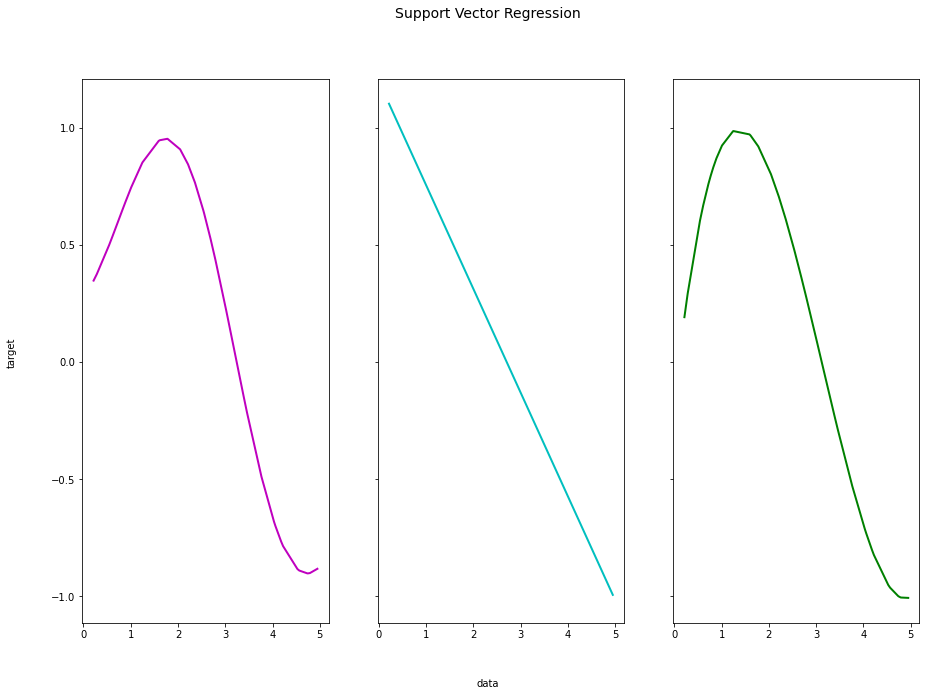

In [13]:
print(__doc__)

import numpy as np
from sklearn.svm import SVR
import matplotlib.pyplot as plt

# #############################################################################
# Generate sample data
X = np.sort(5 * np.random.rand(40, 1), axis=0)
y = np.sin(X).ravel()

# #############################################################################
# Add noise to targets
y[::5] += 3 * (0.5 - np.random.rand(8))

# #############################################################################
# Fit regression model
svr_rbf = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
svr_lin = SVR(kernel='linear', C=100, gamma='auto')
svr_poly = SVR(kernel='poly', C=100, gamma='auto', degree=3, epsilon=.1,
               coef0=1)

# #############################################################################
# Look at the results
lw = 2

svrs = [svr_rbf, svr_lin, svr_poly]
kernel_label = ['RBF', 'Linear', 'Polynomial']
model_color = ['m', 'c', 'g']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 10), sharey=True)
for ix, svr in enumerate(svrs):
    axes[ix].plot(X, svr.fit(X, y).predict(X), color=model_color[ix], lw=lw,
                  label='{} model'.format(kernel_label[ix]))
    #axes[ix].scatter(X[svr.support_], y[svr.support_], facecolor="none",
    #                 edgecolor=model_color[ix], s=50,
    #                 label='{} support vectors'.format(kernel_label[ix]))
    #axes[ix].scatter(X[np.setdiff1d(np.arange(len(X)), svr.support_)],
    #                 y[np.setdiff1d(np.arange(len(X)), svr.support_)],
    #                 facecolor="none", edgecolor="k", s=50,
    #                 label='other training data')
    #axes[ix].legend(loc='upper center', bbox_to_anchor=(0.5, 1.1),
    #                ncol=1, fancybox=True, shadow=True)

fig.text(0.5, 0.04, 'data', ha='center', va='center')
fig.text(0.06, 0.5, 'target', ha='center', va='center', rotation='vertical')
fig.suptitle("Support Vector Regression", fontsize=14)
plt.show()